# **FASTAI**

In [1]:
import numpy as np 
import pandas as pd 
import pathlib

import os
import gc
print(os.listdir("../input"))

from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
import torchvision.models as models

['brain-mri-images-for-brain-tumor-detection']


In [2]:
DATA_DIR='../input/brain-mri-images-for-brain-tumor-detection'

In [3]:
os.listdir(f'{DATA_DIR}')

['no', 'yes', 'brain_tumor_dataset']

In [4]:
data = ImageDataBunch.from_folder(DATA_DIR, train=".", valid_pct=0.2, test=".",
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  size=224, bs=10, num_workers=0).normalize(imagenet_stats)

In [5]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['no', 'yes']


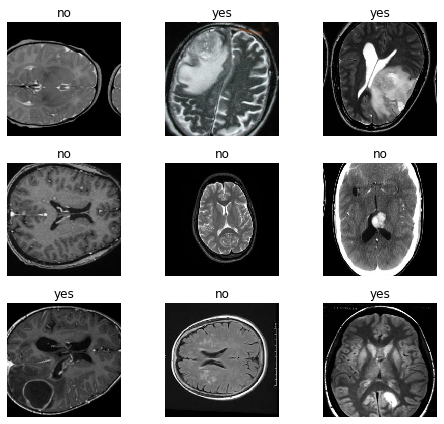

In [6]:
data.show_batch(rows=3, figsize=(7,6))

# **ResNet34**

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


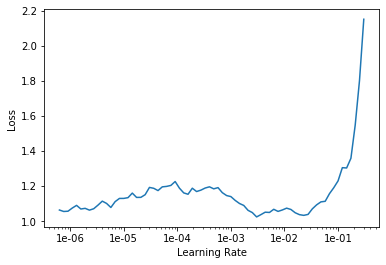

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.993048,0.398034,0.801980,00:08
1,0.882689,1.012353,0.663366,00:07
2,0.813569,0.578300,0.792079,00:07
3,0.894233,1.007046,0.683168,00:07
4,0.736823,0.278276,0.910891,00:08
5,0.674932,0.433739,0.891089,00:07
6,0.608090,0.351185,0.851485,00:07
7,0.429188,0.161056,0.940594,00:07
8,0.368001,0.172521,0.940594,00:08
9,0.293091,0.171037,0.950495,00:07


In [10]:
learn.save('/kaggle/working/model_1')

In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


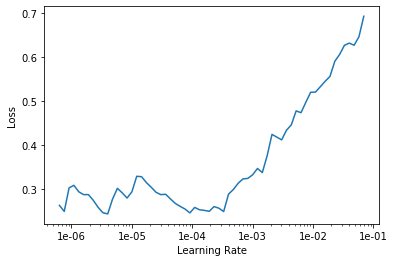

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.272629,0.148016,0.950495,00:08
1,0.231890,0.169058,0.950495,00:08
2,0.221685,0.156396,0.950495,00:08
3,0.232338,0.170063,0.950495,00:08
4,0.242787,0.165319,0.950495,00:08
5,0.215671,0.151652,0.950495,00:08
6,0.247601,0.190494,0.950495,00:08
7,0.231262,0.151717,0.940594,00:08
8,0.242526,0.150406,0.940594,00:08
9,0.215690,0.143954,0.940594,00:08


In [14]:
learn.save('/kaggle/working/stage_2_1')

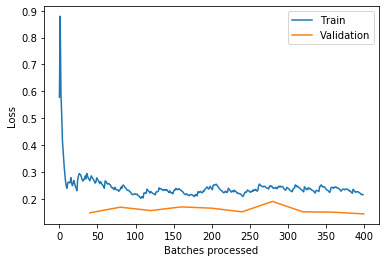

In [15]:
learn.recorder.plot_losses()

In [16]:
preds, targets = learn.get_preds()

In [17]:
pred_labels = preds.argmax(dim=1)

In [18]:
targets = targets.numpy()

In [19]:
conf_matrix = confusion_matrix(targets, pred_labels)

In [20]:
print(conf_matrix)

[[39  3]
 [ 3 56]]


In [21]:
print("Number of samples in validation dataset:", len(data.valid_ds))
print("Dimensions of preds:", preds.shape)
print("Dimensions of targets:", targets.shape)
print("Dimensions of pred_labels:", pred_labels.shape)

Number of samples in validation dataset: 101
Dimensions of preds: torch.Size([101, 2])
Dimensions of targets: (101,)
Dimensions of pred_labels: torch.Size([101])


In [22]:
interp = ClassificationInterpretation.from_learner(learn)

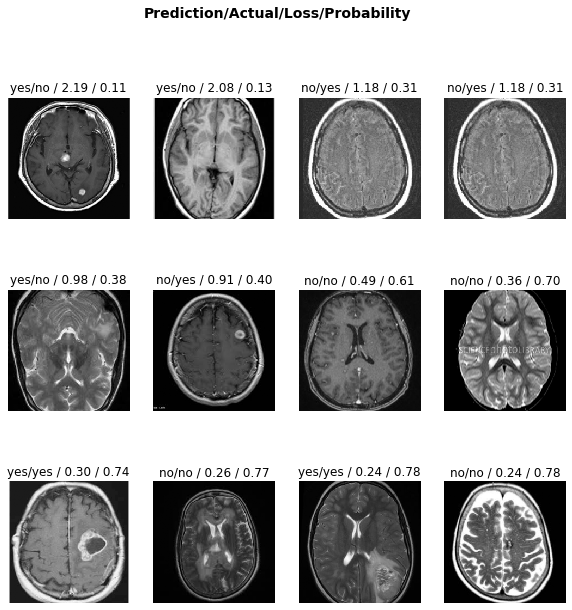

In [23]:
interp.plot_top_losses(12, figsize=(10,10))

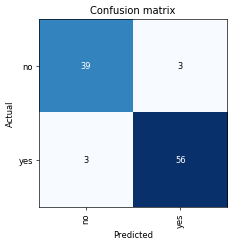

In [24]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [25]:
# Convert targets to a DataFrame for easier manipulation
targets_df = pd.DataFrame(targets, columns=['label'])

# Assuming 0 represents 'normal' and 1 represents 'abnormal', count occurrences
num_normal = (targets_df['label'] == 0).sum()
num_abnormal = (targets_df['label'] == 1).sum()

print("Number of normal images:", num_normal)
print("Number of abnormal images:", num_abnormal)

Number of normal images: 42
Number of abnormal images: 59


# ResNet50

In [26]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


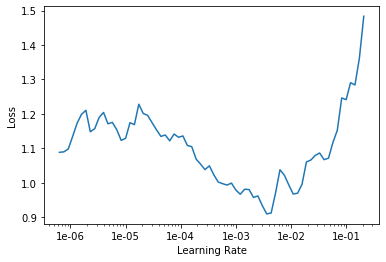

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.026231,1.665101,0.712871,00:09
1,0.881319,1.347830,0.752475,00:08
2,0.732740,0.398261,0.861386,00:08
3,0.762251,1.625619,0.653465,00:09
4,0.679485,0.275743,0.881188,00:08
5,0.643250,0.936652,0.772277,00:08
6,0.635812,0.195525,0.940594,00:08
7,0.453430,0.093426,0.980198,00:08
8,0.325414,0.071653,0.990099,00:08
9,0.260435,0.069248,0.980198,00:08


In [29]:
learn.save('/kaggle/working/model_1')

In [30]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


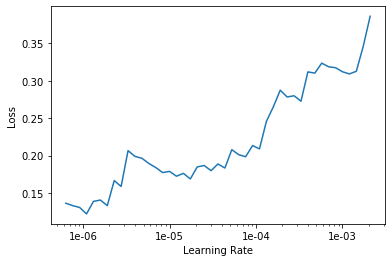

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.196929,0.073376,0.980198,00:09
1,0.211851,0.071677,0.980198,00:09
2,0.242105,0.071068,0.980198,00:09
3,0.267534,0.074984,0.980198,00:09
4,0.228559,0.076331,0.980198,00:09
5,0.231968,0.063506,0.990099,00:09
6,0.229369,0.060290,0.980198,00:09
7,0.279390,0.057377,0.980198,00:09
8,0.241776,0.062726,0.990099,00:09
9,0.197763,0.071564,0.980198,00:09


In [33]:
learn.save('/kaggle/working/stage_2_1')

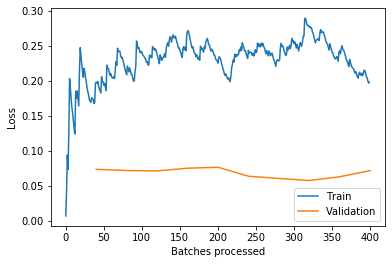

In [34]:
learn.recorder.plot_losses()

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

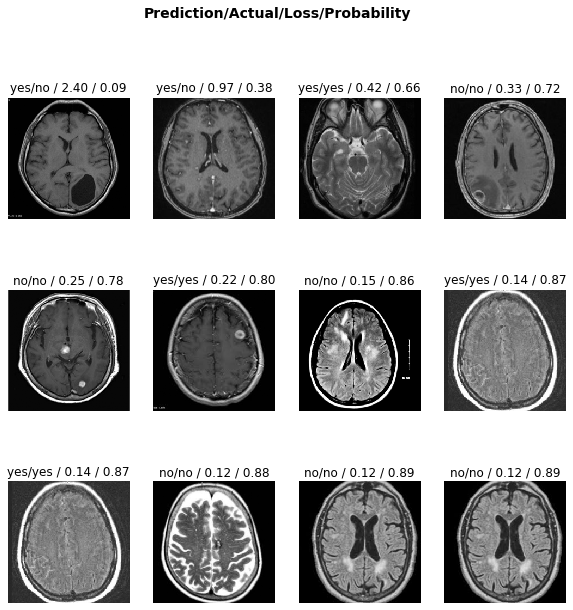

In [36]:
interp.plot_top_losses(12, figsize=(10,10))

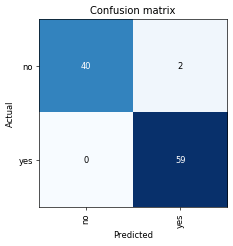

In [37]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [38]:
from sklearn.metrics import classification_report

# Get true labels and predicted labels
true_labels = interp.y_true
predicted_labels = interp.pred_class

# Compute classification metrics
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.98        59

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



# ResNet18

In [39]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


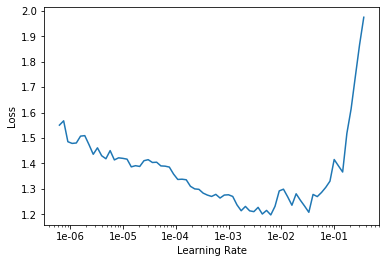

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.870898,0.638543,0.841584,00:07
1,0.716745,0.895322,0.801980,00:07
2,0.775820,0.573707,0.861386,00:07
3,0.845625,0.613684,0.792079,00:07
4,0.763429,0.773298,0.792079,00:07
5,0.664502,0.359970,0.841584,00:07
6,0.572703,0.304017,0.861386,00:07
7,0.453079,0.243136,0.910891,00:07
8,0.415271,0.199090,0.930693,00:07
9,0.367000,0.200381,0.940594,00:07


In [42]:
learn.save('/kaggle/working/model_1')

In [43]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


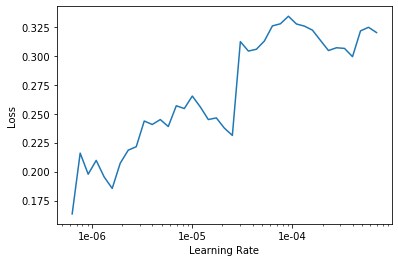

In [44]:
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.283486,0.181748,0.940594,00:08
1,0.287758,0.191750,0.940594,00:07
2,0.272334,0.176020,0.930693,00:07
3,0.270038,0.181229,0.930693,00:07
4,0.319162,0.185907,0.940594,00:07
5,0.293748,0.184813,0.920792,00:07
6,0.289754,0.175661,0.910891,00:07
7,0.301082,0.180600,0.910891,00:07
8,0.304493,0.179885,0.910891,00:07
9,0.285295,0.174207,0.910891,00:07


In [46]:
learn.save('/kaggle/working/stage_2_1')

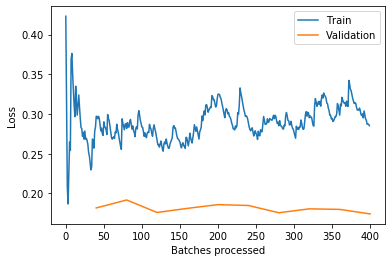

In [47]:
learn.recorder.plot_losses()

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

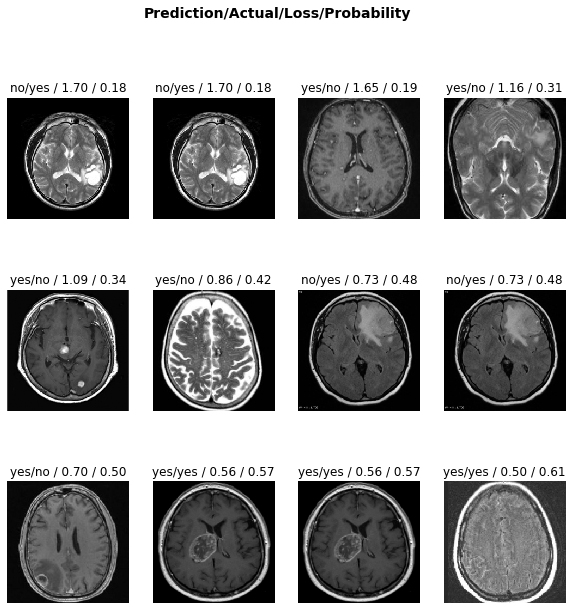

In [49]:
interp.plot_top_losses(12, figsize=(10,10))

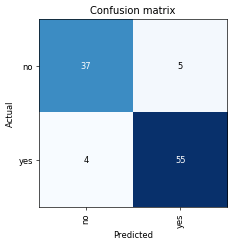

In [50]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [51]:
from sklearn.metrics import classification_report

# Get true labels and predicted labels
true_labels = interp.y_true
predicted_labels = interp.pred_class

# Compute classification metrics
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.92      0.93      0.92        59

    accuracy                           0.91       101
   macro avg       0.91      0.91      0.91       101
weighted avg       0.91      0.91      0.91       101



# ResNet101

In [52]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


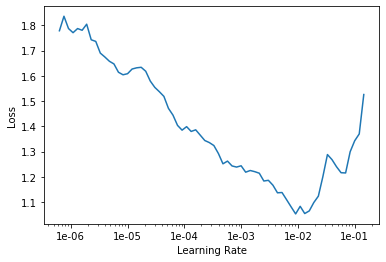

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.005402,3.143393,0.653465,00:10
1,0.866024,2.879896,0.623762,00:10
2,0.747245,0.615085,0.801980,00:10
3,0.741265,1.717538,0.881188,00:10
4,0.645964,0.796355,0.881188,00:10
5,0.574979,0.830632,0.910891,00:10
6,0.562607,0.782624,0.881188,00:10
7,0.475896,0.996074,0.930693,00:10
8,0.411686,1.494430,0.940594,00:10
9,0.284190,2.170731,0.940594,00:10


In [55]:
learn.save('/kaggle/working/model_1')

In [56]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


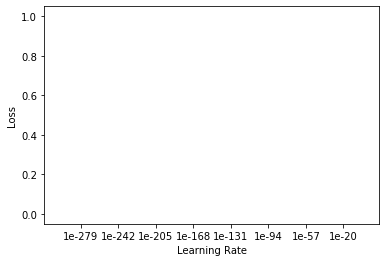

In [57]:
learn.lr_find()
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.269304,2.425830,0.940594,00:12
1,0.233383,2.689264,0.930693,00:12
2,0.205732,2.620464,0.940594,00:12
3,0.198326,1.778549,0.950495,00:12
4,0.211603,2.025601,0.950495,00:12
5,0.222145,2.216980,0.940594,00:12
6,0.224008,2.587076,0.950495,00:12
7,0.242615,2.645622,0.950495,00:12
8,0.211080,2.503443,0.950495,00:12
9,0.196240,2.215934,0.950495,00:11


In [59]:
learn.save('/kaggle/working/stage_2_1')

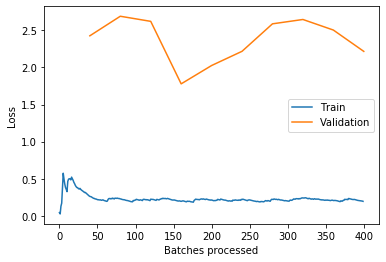

In [60]:
learn.recorder.plot_losses()

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

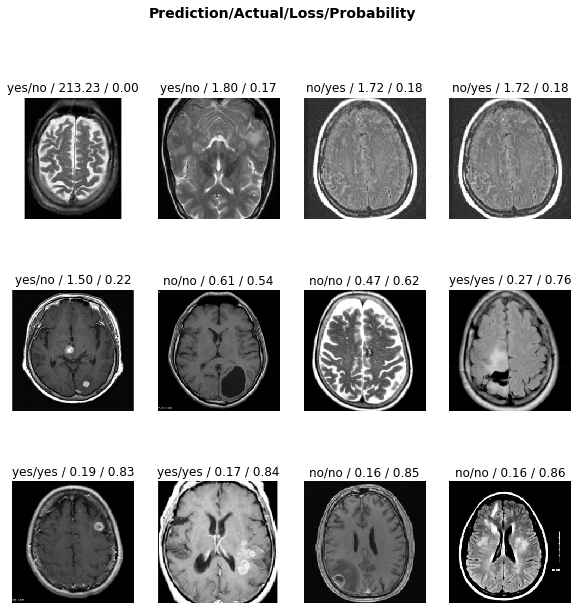

In [62]:
interp.plot_top_losses(12, figsize=(10,10))

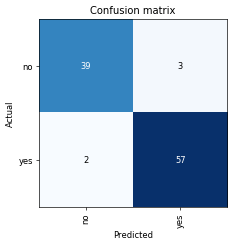

In [63]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

# ResNet152

In [64]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


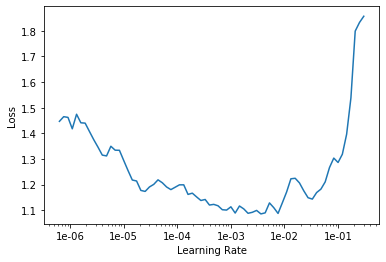

In [65]:
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.985053,1.183949,0.782178,00:12
1,0.918711,0.406370,0.821782,00:12
2,0.904245,0.744311,0.653465,00:12
3,0.870035,0.515082,0.861386,00:12
4,0.820808,0.804286,0.683168,00:12
5,0.696239,0.508960,0.792079,00:12
6,0.566899,0.305279,0.900990,00:12
7,0.446945,0.146057,0.940594,00:12
8,0.322470,0.156463,0.950495,00:12
9,0.247474,0.154003,0.940594,00:12


In [67]:
learn.save('/kaggle/working/model_1')

In [68]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


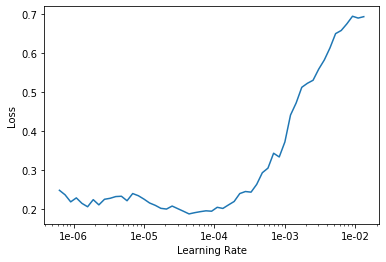

In [69]:
learn.lr_find()
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.312607,0.140107,0.960396,00:14
1,0.263543,0.136089,0.950495,00:14
2,0.268362,0.134362,0.960396,00:14
3,0.214946,0.136278,0.960396,00:14
4,0.209636,0.142085,0.950495,00:14
5,0.234006,0.144065,0.950495,00:14
6,0.200044,0.138594,0.950495,00:14
7,0.200685,0.124396,0.960396,00:14
8,0.197761,0.131134,0.950495,00:14
9,0.196067,0.134564,0.960396,00:14


In [71]:
learn.save('/kaggle/working/stage_2_1')

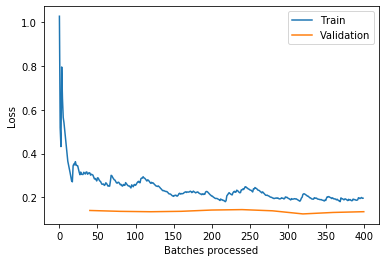

In [72]:
learn.recorder.plot_losses()

In [73]:
interp = ClassificationInterpretation.from_learner(learn)

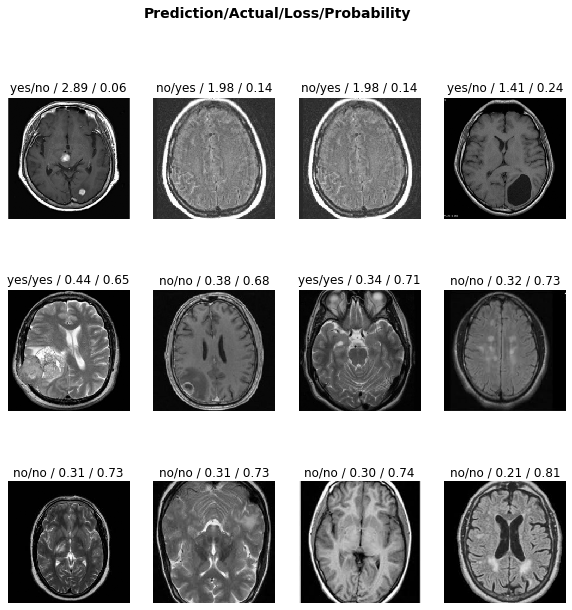

In [74]:
interp.plot_top_losses(12, figsize=(10,10))

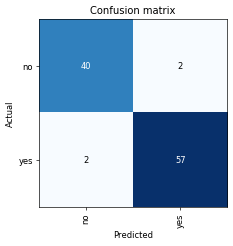

In [75]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

# Wide Residual Network

In [76]:
learn = cnn_learner(data, models.wide_resnet50_2, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/checkpoints/wide_resnet50_2-95faca4d.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


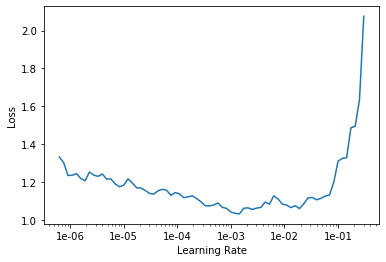

In [77]:
learn.lr_find()
learn.recorder.plot()

In [78]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.022676,1.034382,0.752475,00:11
1,0.866084,1.008117,0.811881,00:10
2,0.862866,1.681897,0.594059,00:10
3,0.796244,1.899151,0.801980,00:10
4,0.759146,1.857933,0.772277,00:10
5,0.675643,1.586126,0.643564,00:10
6,0.621464,0.207758,0.930693,00:10
7,0.471406,0.239670,0.950495,00:10
8,0.338066,0.185213,0.950495,00:10
9,0.262415,0.150311,0.950495,00:10


In [79]:
learn.save('/kaggle/working/model_1')

In [80]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


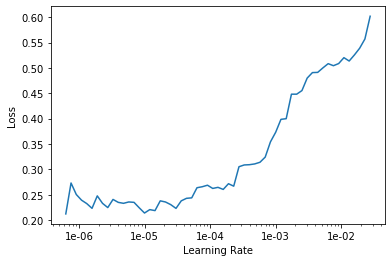

In [81]:
learn.lr_find()
learn.recorder.plot()

In [82]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.207963,0.136362,0.950495,00:12
1,0.193976,0.145725,0.950495,00:12
2,0.219628,0.164122,0.950495,00:12
3,0.228756,0.153595,0.950495,00:12
4,0.233591,0.174695,0.950495,00:12
5,0.201904,0.141794,0.950495,00:12
6,0.218267,0.134277,0.950495,00:12
7,0.201699,0.134485,0.950495,00:12
8,0.205245,0.161153,0.950495,00:12
9,0.191562,0.172806,0.950495,00:12


In [83]:
learn.save('/kaggle/working/stage_2_1')

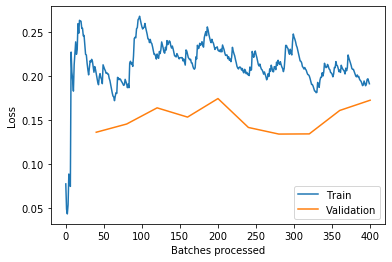

In [84]:
learn.recorder.plot_losses()

In [85]:
interp = ClassificationInterpretation.from_learner(learn)

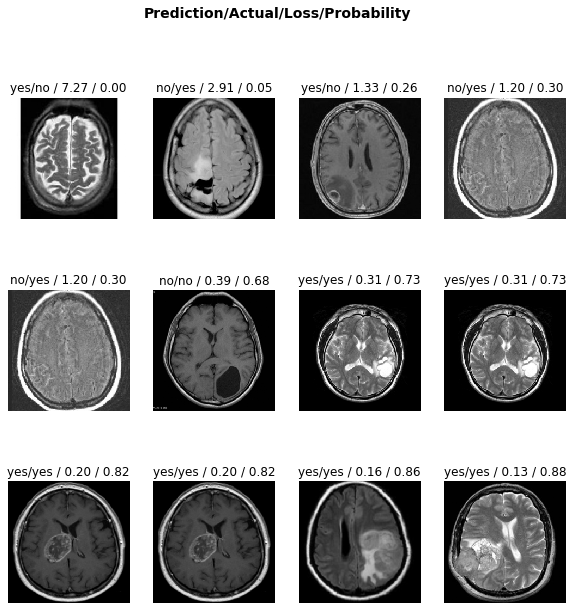

In [86]:
interp.plot_top_losses(12, figsize=(10,10))

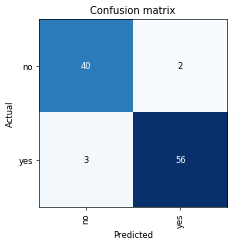

In [87]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

# ResNeXT50

In [88]:
learn = cnn_learner(data, models.resnext50_32x4d, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


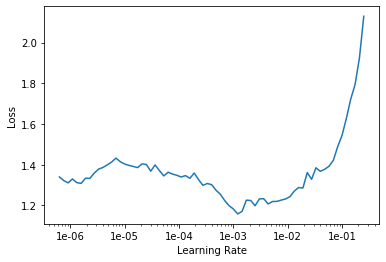

In [89]:
learn.lr_find()
learn.recorder.plot()

In [90]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.980155,1.699905,0.653465,00:10
1,0.970175,0.594217,0.772277,00:09
2,0.840421,0.807086,0.831683,00:09
3,0.737973,1.219492,0.663366,00:10
4,0.726551,0.620349,0.772277,00:09
5,0.613283,0.867150,0.693069,00:09
6,0.509610,0.435998,0.881188,00:09
7,0.471645,0.201399,0.930693,00:09
8,0.356036,0.158587,0.910891,00:09
9,0.270924,0.125369,0.930693,00:09


In [91]:
learn.save('/kaggle/working/model_1')

In [92]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


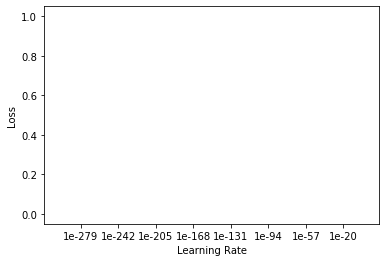

In [93]:
learn.lr_find()
learn.recorder.plot()

In [94]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.197778,0.128250,0.940594,00:11
1,0.229172,0.142754,0.920792,00:11
2,0.186635,0.139285,0.920792,00:11
3,0.171571,0.136858,0.920792,00:11
4,0.207251,0.114447,0.930693,00:10
5,0.253491,0.125473,0.920792,00:11
6,0.188933,0.128336,0.940594,00:11
7,0.197841,0.123890,0.940594,00:11
8,0.229419,0.135697,0.920792,00:11
9,0.209934,0.161072,0.920792,00:11


In [95]:
learn.save('/kaggle/working/stage_2_1')

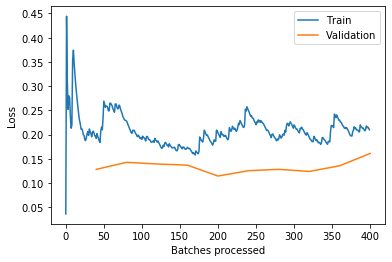

In [96]:
learn.recorder.plot_losses()

In [97]:
interp = ClassificationInterpretation.from_learner(learn)

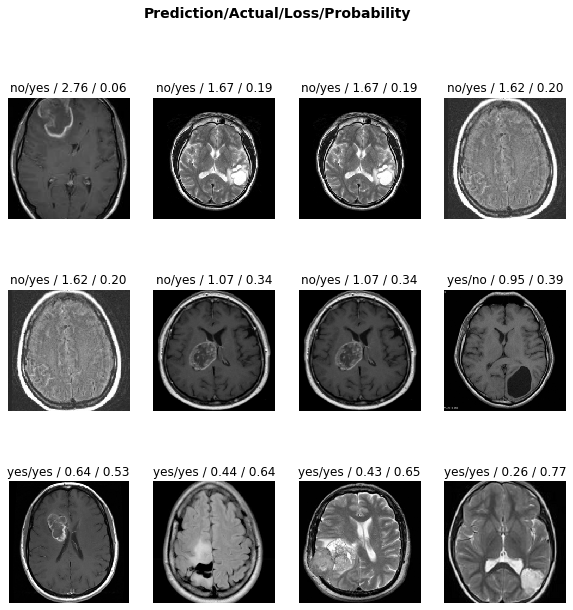

In [98]:
interp.plot_top_losses(12, figsize=(10,10))

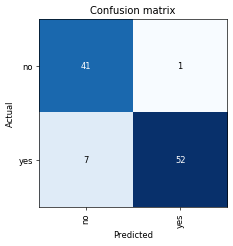

In [99]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

# ResNeXT101

In [100]:
learn = cnn_learner(data, models.resnext101_32x8d, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/checkpoints/resnext101_32x8d-8ba56ff5.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


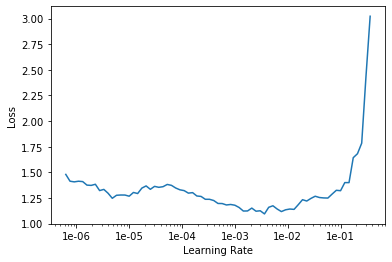

In [101]:
learn.lr_find()
learn.recorder.plot()

In [102]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.038524,0.940063,0.851485,00:16
1,0.928669,0.391976,0.831683,00:15
2,0.794392,0.615986,0.821782,00:15
3,0.769403,0.533397,0.841584,00:15
4,0.799846,0.436419,0.851485,00:15
5,0.671836,0.477292,0.881188,00:15
6,0.556072,0.331363,0.891089,00:15
7,0.406296,0.132942,0.940594,00:15
8,0.316432,0.196102,0.940594,00:15
9,0.259373,0.193236,0.950495,00:15


In [103]:
learn.save('/kaggle/working/model_1')

In [104]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


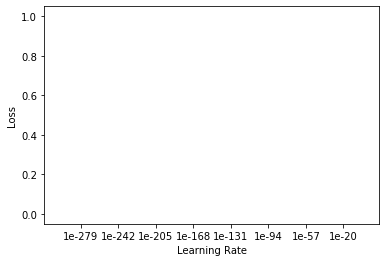

In [105]:
learn.lr_find()
learn.recorder.plot()

In [106]:
learn.fit_one_cycle(10,1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.321837,0.209375,0.950495,00:19
1,0.244921,0.219796,0.920792,00:19
2,0.196297,0.197947,0.920792,00:19
3,0.191258,0.181742,0.930693,00:19
4,0.212648,0.173591,0.950495,00:19
5,0.200782,0.166378,0.950495,00:19
6,0.205661,0.159122,0.950495,00:19
7,0.179175,0.160996,0.960396,00:19
8,0.248751,0.167116,0.960396,00:19
9,0.236051,0.170561,0.950495,00:19


In [107]:
learn.save('/kaggle/working/stage_2_1')

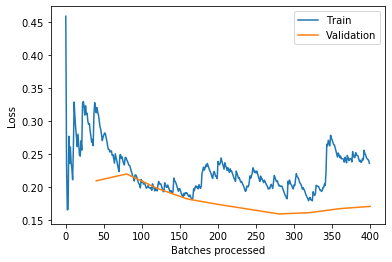

In [108]:
learn.recorder.plot_losses()

In [109]:
interp = ClassificationInterpretation.from_learner(learn)

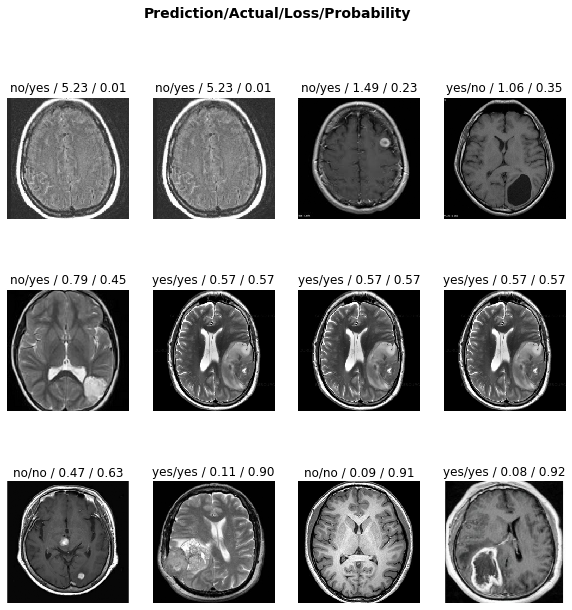

In [110]:
interp.plot_top_losses(12, figsize=(10,10))

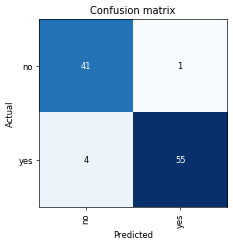

In [111]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)